In [2]:
import pandas as pd

# cargar el dataset
file_path ='./Online_Retail.csv'
data = pd.read_csv(file_path, encoding='cp1252')

Entender lo basico del dataframe

In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
data.describe() # devuelve la estadistica basica

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Encontrar si hay valores nulos o duplicados

In [6]:
data.isnull().sum() # dice el numero total de valores nulos

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data.duplicated().sum() # dice el numero total de valores duplicados

np.int64(5268)

In [8]:
unique_values = {col: data[col].unique() for col in data.columns}

for col, values in unique_values.items():
  print(f'Columna: {col}')
  print(f'Numero de valores unicos: {len(values)}')
  print(f'Valores unicos: {values[:10]}') # primeros 10 valores
  print('-'*50)

Columna: InvoiceNo
Numero de valores unicos: 25900
Valores unicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna: StockCode
Numero de valores unicos: 4070
Valores unicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna: Description
Numero de valores unicos: 4224
Valores unicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna: Quantity
Numero de valores unicos: 722
Valores unicos: [ 6  8  2 32  3  4 24 12 48 18]
-------------------------------------------------

Iniciando la limpieza de datos

In [9]:
data_cleaned = data.drop_duplicates()

data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [10]:
data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
data_cleaned.duplicated().sum()

np.int64(0)

Paso 2. Creacion de columnas

In [12]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [14]:
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


conviritiendo la columna 'invoiceDate'

In [15]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned.head()

/tmp/ipykernel_6828/2910249818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
print(data.info(), '\n')
print(data_cleaned.info()) # Cambiando a datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  

creando nuevas columnas, de año y mes

In [19]:
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


Realizando insights, analizando las ventas por año,

In [ ]:
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum() # agrupacion anual
sales_by_year

Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64

Analizando las ventas por semestre

<Axes: xlabel='Year,Semester'>

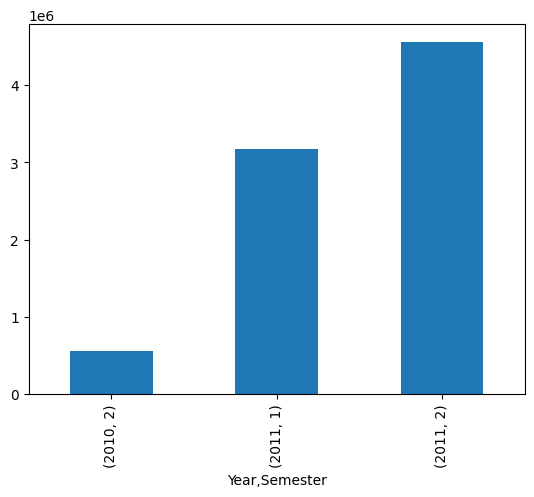

In [49]:
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x: 1 if x <= 6 else 2) # Agrupando desde enero hasta junio como semestre 1 y el resto como semestre 2
sales_by_semester = data_cleaned.groupby(['Year', 'Semester'])['TotalAmount'].sum()
sales_by_semester.plot(kind='bar')

Analizando ventas por trimestre

<Axes: xlabel='Year,Quarter'>

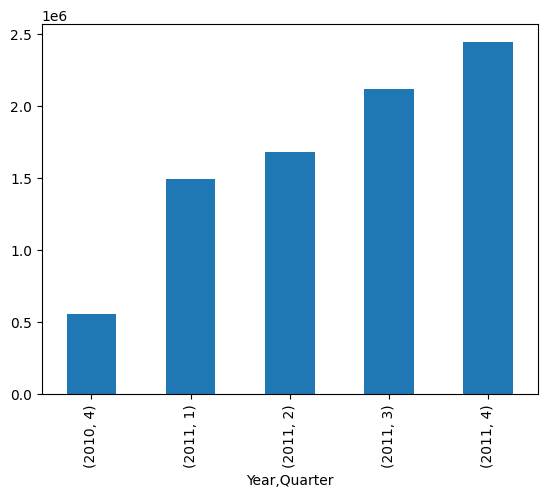

In [48]:
data_cleaned['Quarter'] = data_cleaned['Month'].apply(lambda x: (x -1) // 3 + 1)
sales_by_quarter = data_cleaned.groupby(['Year', 'Quarter'])['TotalAmount'].sum().plot(kind='bar')
sales_by_quarter

<Axes: xlabel='Year,Month'>

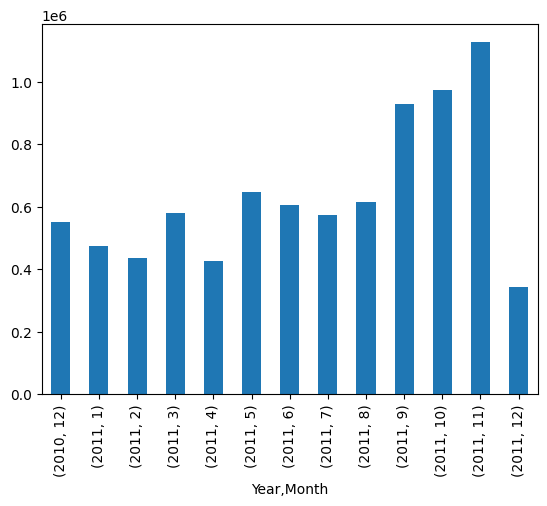

In [47]:
sales_by_month = data_cleaned.groupby(['Year','Month'])['TotalAmount'].sum().plot(kind='bar')
sales_by_month

Paso 4. Visualizacion

In [28]:
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0] # viendo las devoluciones
total_returns

8872

In [29]:
total_non_returns = data_cleaned[data_cleaned['Quantity'] >= 0].shape[0] # viendo los totales sin retornos
total_non_returns

392732

Graficando las devoluciones y el stock actual

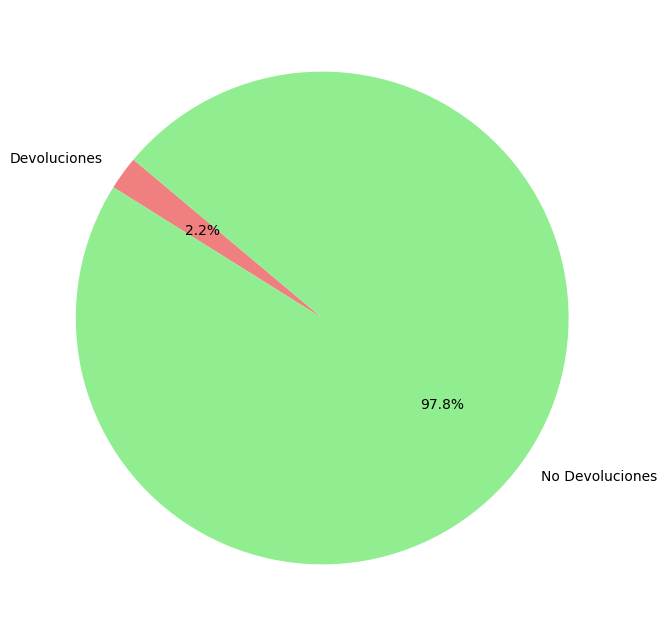

In [ ]:
import matplotlib.pyplot as plt

labels = ['Devoluciones', 'No Devoluciones']
sizes = [total_returns, total_non_returns]
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize= (8, 8))
plt.pie(sizes, labels= labels, colors= colors, startangle=140, autopct='%1.1f%%') # Agregamos autopct para mostrar los porcentajes

plt.show()

Creando una columna categoria segun el monto de venta

In [35]:
# Crear una columna categórica basada en el monto total de la transacción (ejemplo: 'Low', 'Medium', 'High')
def categorize_total_amount(amount):
    if amount < 20:
        return 'Low'
    elif 20 <= amount < 100:
        return 'Medium'
    else:
        return 'High'

data_cleaned['AmountCategory'] = data_cleaned['TotalAmount'].apply(categorize_total_amount)

# Mostrar las primeras filas con las nuevas columnas
data_cleaned.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,Quarter,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,4,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4,Medium
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,4,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4,Medium
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4,Medium
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010,12,2,4,Low
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010,12,2,4,Medium
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,2,4,Low
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,2,4,Low
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010,12,2,4,Medium


Graficando segun su categoria: "low, medium, high"

In [38]:
low_sales = data_cleaned[data_cleaned['AmountCategory'] == 'Low'].shape[0] # viendo las devoluciones
low_sales

315319

In [40]:
medium_sales = data_cleaned[data_cleaned['AmountCategory'] == 'Medium'].shape[0] # viendo las devoluciones
medium_sales

74616

In [41]:
high_sales = data_cleaned[data_cleaned['AmountCategory'] == 'High'].shape[0] # viendo las devoluciones
high_sales

11669

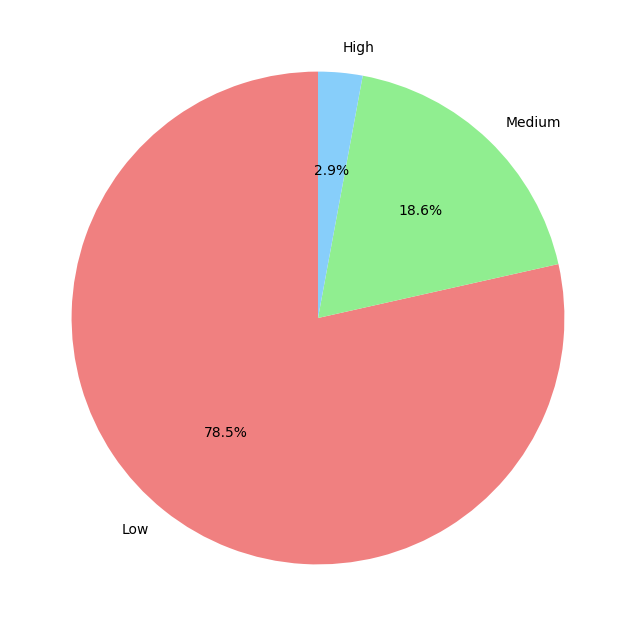

In [43]:
labels = ['Low', 'Medium', 'High']
sizes = [low_sales, medium_sales, high_sales]
colors = ['lightcoral', 'lightgreen', 'lightskyblue']
plt.figure(figsize= (8, 8))
plt.pie(sizes, labels= labels, colors= colors, startangle=90, autopct='%1.1f%%') # Agregamos autopct para mostrar los porcentajes

plt.show()

ventas graficando por cada uno de los meses

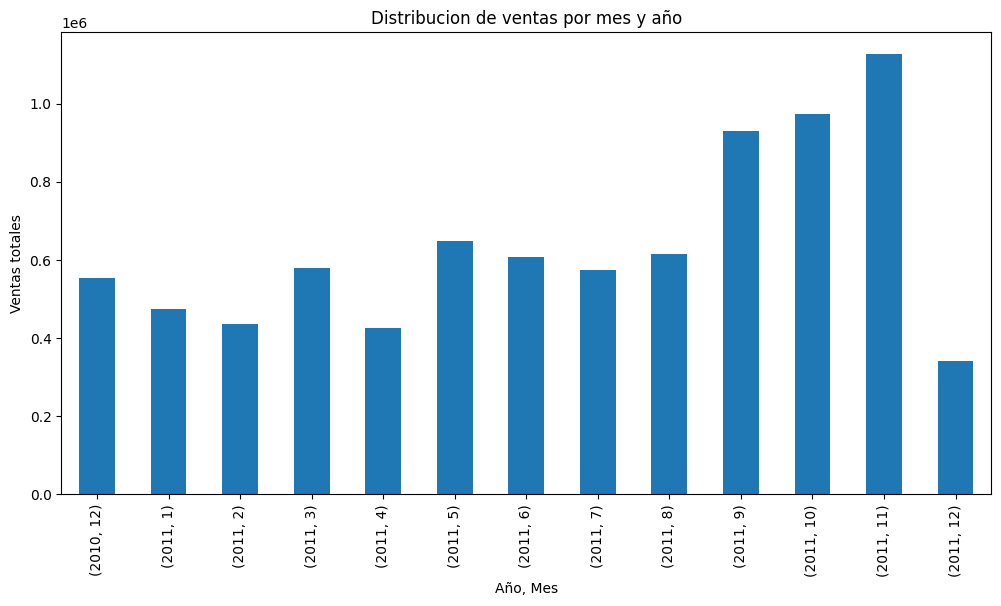

In [46]:
plt.figure(figsize=(12, 6))
data_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(kind='bar')
plt.title('Distribucion de ventas por mes y año')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas totales')
plt.show()

Graficando el top 10 de los mas vendidos

In [51]:
top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index() # reinicia los indices para proceder con la graficacion
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')

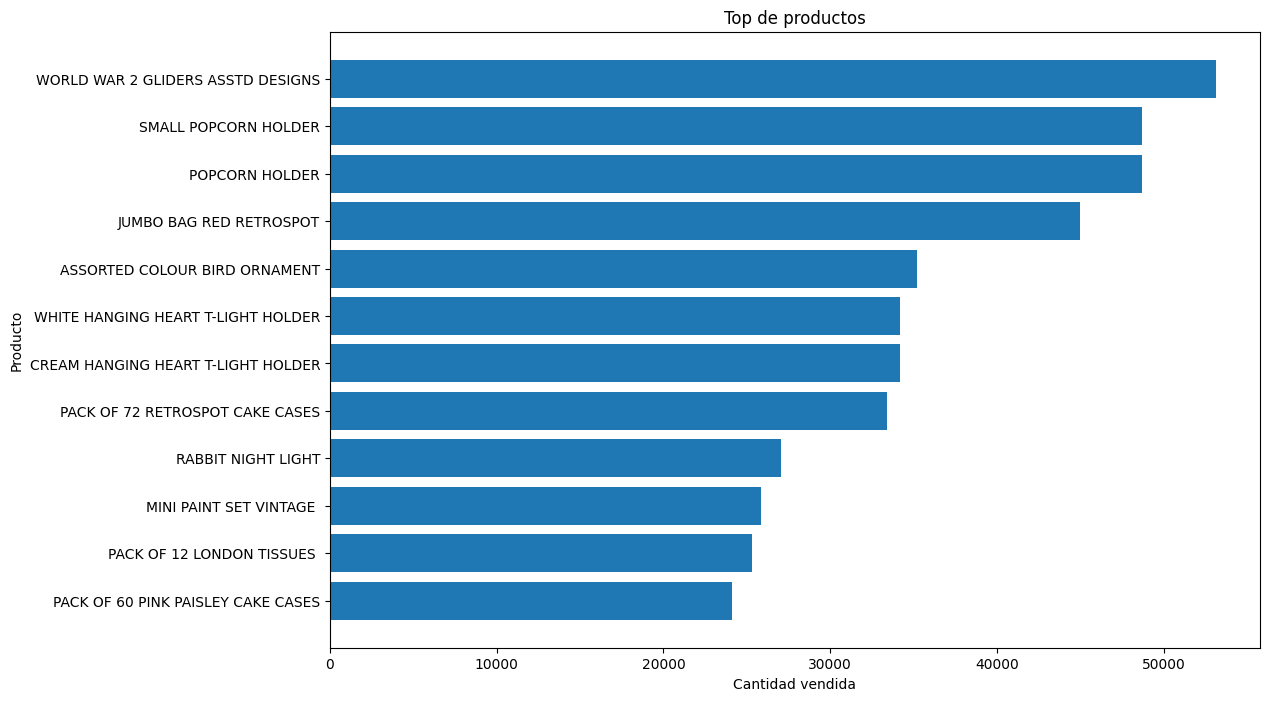

In [52]:
plt.figure(figsize=(12, 8))
plt.barh(top_products['Description'], top_products['Quantity'])
plt.title('Top de productos')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()

plt.show()